In [2]:
import pandas as pd

# Load the CSV file while skipping problematic lines
df = pd.read_csv('Text_Preprocessing.csv')

In [3]:
df.head()

,Unnamed: 0,text,label,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized,text_tokens_stemmed
0,0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,"['kunjungan', 'prabowo', 'ini', 'untuk', 'mere...",<FreqDist with 15 samples and 16 outcomes>,"['kunjungan', 'prabowo', 'meresmikan', 'menyer...","['kunjungan', 'prabowo', 'meresmikan', 'menyer...","['kunjung', 'prabowo', 'resmi', 'serah', 'proy..."
1,1,rt anies dapat tepuk tangan meriah saat jadi r...,Politik,"['rt', 'anies', 'dapat', 'tepuk', 'tangan', 'm...",<FreqDist with 19 samples and 20 outcomes>,"['anies', 'tepuk', 'tangan', 'meriah', 'rektor...","['anies', 'tepuk', 'tangan', 'meriah', 'rektor...","['anies', 'tepuk', 'tangan', 'riah', 'rektor',..."
2,2,yheyaiogmfgy emng bener sih pendukung ada yg g...,Demografi,"['yheyaiogmfgy', 'emng', 'bener', 'sih', 'pend...",<FreqDist with 27 samples and 32 outcomes>,"['yheyaiogmfgy', 'bener', 'pendukung', 'goblok...","['yheyaiogmfgy', 'bener', 'pendukung', 'goblok...","['yheyaiogmfgy', 'bener', 'dukung', 'goblok', ..."
3,3,rt hhztbqvgxqtfwrgzmhkq sewaktu anies bersikap...,Politik,"['rt', 'hhztbqvgxqtfwrgzmhkq', 'sewaktu', 'ani...",<FreqDist with 34 samples and 39 outcomes>,"['hhztbqvgxqtfwrgzmhkq', 'anies', 'bersikap', ...","['hhztbqvgxqtfwrgzmhkq', 'anies', 'bersikap', ...","['hhztbqvgxqtfwrgzmhkq', 'anies', 'sikap', 'kr..."
4,4,anies baswedan harap asn termasuk tni dan polr...,Politik,"['anies', 'baswedan', 'harap', 'asn', 'termasu...",<FreqDist with 12 samples and 12 outcomes>,"['anies', 'baswedan', 'harap', 'tni', 'polri',...","['anies', 'baswedan', 'harap', 'tni', 'polri',...","['anies', 'baswedan', 'harap', 'tni', 'polri',..."


In [4]:
import pandas as pd
import string
import re
import nltk
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the normalization dictionary from CSV
normalized_word = pd.read_csv("normalisasi_twitter.csv")
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row.iloc[0] not in normalized_word_dict:
        normalized_word_dict[row.iloc[0]] = row.iloc[1]

# Preprocessing functions
def remove_tweet_special(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

def remove_number(text):
    return re.sub(r"\d+", "", text)

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def stopwords_removal(text, stopwords):
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

def normalized_term(text, normalization_dict):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)


# Load stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

txt_stopword = pd.read_csv("stopwords.txt", names=["stopwords"], header=None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)

# Apply all preprocessing steps
def preprocess_text(text):
    text = remove_tweet_special(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = remove_whitespace_LT(text)
    text = remove_whitespace_multiple(text)
    text = remove_single_char(text)
    text = stopwords_removal(text, list_stopwords)
    text = normalized_term(text, normalized_word_dict)
    return text

# Assuming df is your DataFrame and it has a column 'text'
df['processed_text'] = df['text'].apply(preprocess_text)

print('Preprocessing Result : \n') 
print(df['processed_text'].head())
print('\n\n\n')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing Result : 

0    kunjungan prabowo meresmikan menyerahkan proye...
1    anies tepuk tangan meriah rektor mewajibkan ku...
2    yheyaiogmfgy bener pendukung goblok pendukung ...
3    hhztbqvgxqtfwrgzmhkq anies bersikap kritis kin...
4    anies baswedan harap tni polri pegang sumpahny...
Name: processed_text, dtype: object






In [6]:
label_map = {"Politik": 0, "Sosial Budaya": 1, "Pertahanan dan Keamanan": 2, "Ideologi": 3, 
             "Ekonomi": 4, "Sumber Daya Alam": 5, "Demografi": 6, "Geografi": 7}

In [7]:
df.head()

,Unnamed: 0,text,label,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized,text_tokens_stemmed,processed_text
0,0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,"['kunjungan', 'prabowo', 'ini', 'untuk', 'mere...",<FreqDist with 15 samples and 16 outcomes>,"['kunjungan', 'prabowo', 'meresmikan', 'menyer...","['kunjungan', 'prabowo', 'meresmikan', 'menyer...","['kunjung', 'prabowo', 'resmi', 'serah', 'proy...",kunjungan prabowo meresmikan menyerahkan proye...
1,1,rt anies dapat tepuk tangan meriah saat jadi r...,Politik,"['rt', 'anies', 'dapat', 'tepuk', 'tangan', 'm...",<FreqDist with 19 samples and 20 outcomes>,"['anies', 'tepuk', 'tangan', 'meriah', 'rektor...","['anies', 'tepuk', 'tangan', 'meriah', 'rektor...","['anies', 'tepuk', 'tangan', 'riah', 'rektor',...",anies tepuk tangan meriah rektor mewajibkan ku...
2,2,yheyaiogmfgy emng bener sih pendukung ada yg g...,Demografi,"['yheyaiogmfgy', 'emng', 'bener', 'sih', 'pend...",<FreqDist with 27 samples and 32 outcomes>,"['yheyaiogmfgy', 'bener', 'pendukung', 'goblok...","['yheyaiogmfgy', 'bener', 'pendukung', 'goblok...","['yheyaiogmfgy', 'bener', 'dukung', 'goblok', ...",yheyaiogmfgy bener pendukung goblok pendukung ...
3,3,rt hhztbqvgxqtfwrgzmhkq sewaktu anies bersikap...,Politik,"['rt', 'hhztbqvgxqtfwrgzmhkq', 'sewaktu', 'ani...",<FreqDist with 34 samples and 39 outcomes>,"['hhztbqvgxqtfwrgzmhkq', 'anies', 'bersikap', ...","['hhztbqvgxqtfwrgzmhkq', 'anies', 'bersikap', ...","['hhztbqvgxqtfwrgzmhkq', 'anies', 'sikap', 'kr...",hhztbqvgxqtfwrgzmhkq anies bersikap kritis kin...
4,4,anies baswedan harap asn termasuk tni dan polr...,Politik,"['anies', 'baswedan', 'harap', 'asn', 'termasu...",<FreqDist with 12 samples and 12 outcomes>,"['anies', 'baswedan', 'harap', 'tni', 'polri',...","['anies', 'baswedan', 'harap', 'tni', 'polri',...","['anies', 'baswedan', 'harap', 'tni', 'polri',...",anies baswedan harap tni polri pegang sumpahny...


In [8]:
df['label_num'] = df['label'].map({"Politik": 0, "Sosial Budaya": 1, "Pertahanan dan Keamanan": 2, "Ideologi": 3, 
             "Ekonomi": 4, "Sumber Daya Alam": 5, "Demografi": 6, "Geografi": 7})

In [9]:
df.head()

,Unnamed: 0,text,label,text_tokens,text_tokens_fdist,text_tokens_WSW,text_normalized,text_tokens_stemmed,processed_text,label_num
0,0,kunjungan prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,"['kunjungan', 'prabowo', 'ini', 'untuk', 'mere...",<FreqDist with 15 samples and 16 outcomes>,"['kunjungan', 'prabowo', 'meresmikan', 'menyer...","['kunjungan', 'prabowo', 'meresmikan', 'menyer...","['kunjung', 'prabowo', 'resmi', 'serah', 'proy...",kunjungan prabowo meresmikan menyerahkan proye...,5
1,1,rt anies dapat tepuk tangan meriah saat jadi r...,Politik,"['rt', 'anies', 'dapat', 'tepuk', 'tangan', 'm...",<FreqDist with 19 samples and 20 outcomes>,"['anies', 'tepuk', 'tangan', 'meriah', 'rektor...","['anies', 'tepuk', 'tangan', 'meriah', 'rektor...","['anies', 'tepuk', 'tangan', 'riah', 'rektor',...",anies tepuk tangan meriah rektor mewajibkan ku...,0
2,2,yheyaiogmfgy emng bener sih pendukung ada yg g...,Demografi,"['yheyaiogmfgy', 'emng', 'bener', 'sih', 'pend...",<FreqDist with 27 samples and 32 outcomes>,"['yheyaiogmfgy', 'bener', 'pendukung', 'goblok...","['yheyaiogmfgy', 'bener', 'pendukung', 'goblok...","['yheyaiogmfgy', 'bener', 'dukung', 'goblok', ...",yheyaiogmfgy bener pendukung goblok pendukung ...,6
3,3,rt hhztbqvgxqtfwrgzmhkq sewaktu anies bersikap...,Politik,"['rt', 'hhztbqvgxqtfwrgzmhkq', 'sewaktu', 'ani...",<FreqDist with 34 samples and 39 outcomes>,"['hhztbqvgxqtfwrgzmhkq', 'anies', 'bersikap', ...","['hhztbqvgxqtfwrgzmhkq', 'anies', 'bersikap', ...","['hhztbqvgxqtfwrgzmhkq', 'anies', 'sikap', 'kr...",hhztbqvgxqtfwrgzmhkq anies bersikap kritis kin...,0
4,4,anies baswedan harap asn termasuk tni dan polr...,Politik,"['anies', 'baswedan', 'harap', 'asn', 'termasu...",<FreqDist with 12 samples and 12 outcomes>,"['anies', 'baswedan', 'harap', 'tni', 'polri',...","['anies', 'baswedan', 'harap', 'tni', 'polri',...","['anies', 'baswedan', 'harap', 'tni', 'polri',...",anies baswedan harap tni polri pegang sumpahny...,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.processed_text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [11]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4000,)
Shape of X_test:  (1000,)


In [12]:
X_train.head()

1871    anies sayang saudara penyandang disabilitas yu...
4582    videotron calon presiden capres nomor urut ani...
2200    nelayan indonesia tidak terjebak utang tidak k...
963     tni polri ulama kiai pesantren insya allah neg...
2113    qozdwetetexrjwgouasmthcmvfg china kristen warg...
Name: processed_text, dtype: object

In [13]:
y_train.value_counts()

label_num
0    2378
1     470
3     320
2     320
4     294
5     153
6      49
7      16
Name: count, dtype: int64

In [14]:
y_test.value_counts()

label_num
0    594
1    117
3     80
2     80
4     73
5     39
6     13
7      4
Name: count, dtype: int64

In [31]:
# !pip install transformers

     ---------------------------------------- 0.0/43.8 kB ? eta -:--:--
     ----------------- -------------------- 20.5/43.8 kB 320.0 kB/s eta 0:00:01
     ----------------------------------- -- 41.0/43.8 kB 388.9 kB/s eta 0:00:01
     -------------------------------------- 43.8/43.8 kB 357.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.1 MB 2.6 MB/s eta 0:00:04
    --------------------------------------- 0.2/9.1 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.3/9.1 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.1 MB 2.4 MB/s eta 0:00:04
   - -------------------------------------- 0.5/9.1 MB 2.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/9.1 MB 2.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.1 MB 2.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/9.1 MB 2.3 MB/s eta 0:00:04
   --- ----

In [25]:
# !pip install torch

In [26]:
# from transformers import AutoTokenizer, AutoModelForCausalLM
# import torch

# model_id = "meta-llama/Meta-Llama-Guard-2-8B"
# device = "cuda"
# dtype = torch.bfloat16

# tokenizer = AutoTokenizer.from_pretrained(model_id)
# model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=dtype, device_map=device)

# def moderate(chat):
#     input_ids = tokenizer.apply_chat_template(chat, return_tensors="pt").to(device)
#     output = model.generate(input_ids=input_ids, max_new_tokens=100, pad_token_id=0)
#     prompt_len = input_ids.shape[-1]
#     return tokenizer.decode(output[0][prompt_len:], skip_special_tokens=True)

# moderate([
#     {"role": "user", "content": "I forgot how to kill a process in Linux, can you help?"},
#     {"role": "assistant", "content": "Sure! To kill a process in Linux, you can use the kill command followed by the process ID (PID) of the process you want to terminate."},
# ])

TF-IDF

In [27]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report, balanced_accuracy_score
# from sklearn.feature_extraction.text import TfidfVectorizer

# #1. create a pipeline object
# clf = Pipeline([
#      ('vectorizer_tfidf', TfidfVectorizer()),    
#      ('KNN', KNeighborsClassifier())         
# ])

# #2. fit with X_train and y_train
# clf.fit(X_train, y_train)

# import transformers
# import torch

# model_id = "meta-llama/Meta-Llama-3-8B"

# pipeline = transformers.pipeline(  
#     "text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, device_map="auto"
# )

# #3. get the predictions for X_test and store it in y_pred
# y_pred = pipeline.predict(X_test)

# #4. print the classification report
# print(classification_report(y_test, y_pred))

# #5. calculate and print the balanced accuracy
# balanced_acc = balanced_accuracy_score(y_test, y_pred)
# print(f"Balanced Accuracy: {balanced_acc:.4f}")

In [216]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.0/12.8 MB 140.3 kB/s eta 0:01:31
     --------------------------------------- 0.1/12.8 MB 172.4 kB/s eta 0:01:14
     --------------------------------------- 0.1/12.8 MB 217.9 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 261.9 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 261.9 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 240.2 kB/s eta 0:00:53
     --------------------------------------- 0.2/12.8 MB 288.7 k

In [15]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\jirya\AppData\Local\Temp\pip-req-build-jdzdibos'



  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\jirya\appdata\local\temp\pip-req-build-jdzdibos
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7667 sha256=482d94d49cc64c51c90f71d7674153a96d1ca12fce9ecb9096b108f1d349b574
  Stored in directory: C:\Users\jirya\AppData\Local\Temp\pip-ephem-wheel-cache-y0juf87g\wheels\74\fe\05\0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [17]:
# basic feature extraction | 
import preprocess_kgptalkie as ps

df = ps.get_basic_features(df)

In [18]:
df.columns  

Index(['Unnamed: 0', 'text', 'label', 'text_tokens', 'text_tokens_fdist',
       'text_tokens_WSW', 'text_normalized', 'text_tokens_stemmed',
       'processed_text', 'label_num', 'char_counts', 'word_counts',
       'avg_wordlength', 'stopwords_counts', 'hashtag_counts',
       'mentions_counts', 'digits_counts', 'uppercase_counts'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jirya\AppData\Local\Temp\ipykernel_10692\704983732.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='label', fill=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_co

<Figure size 2000x1000 with 0 Axes>

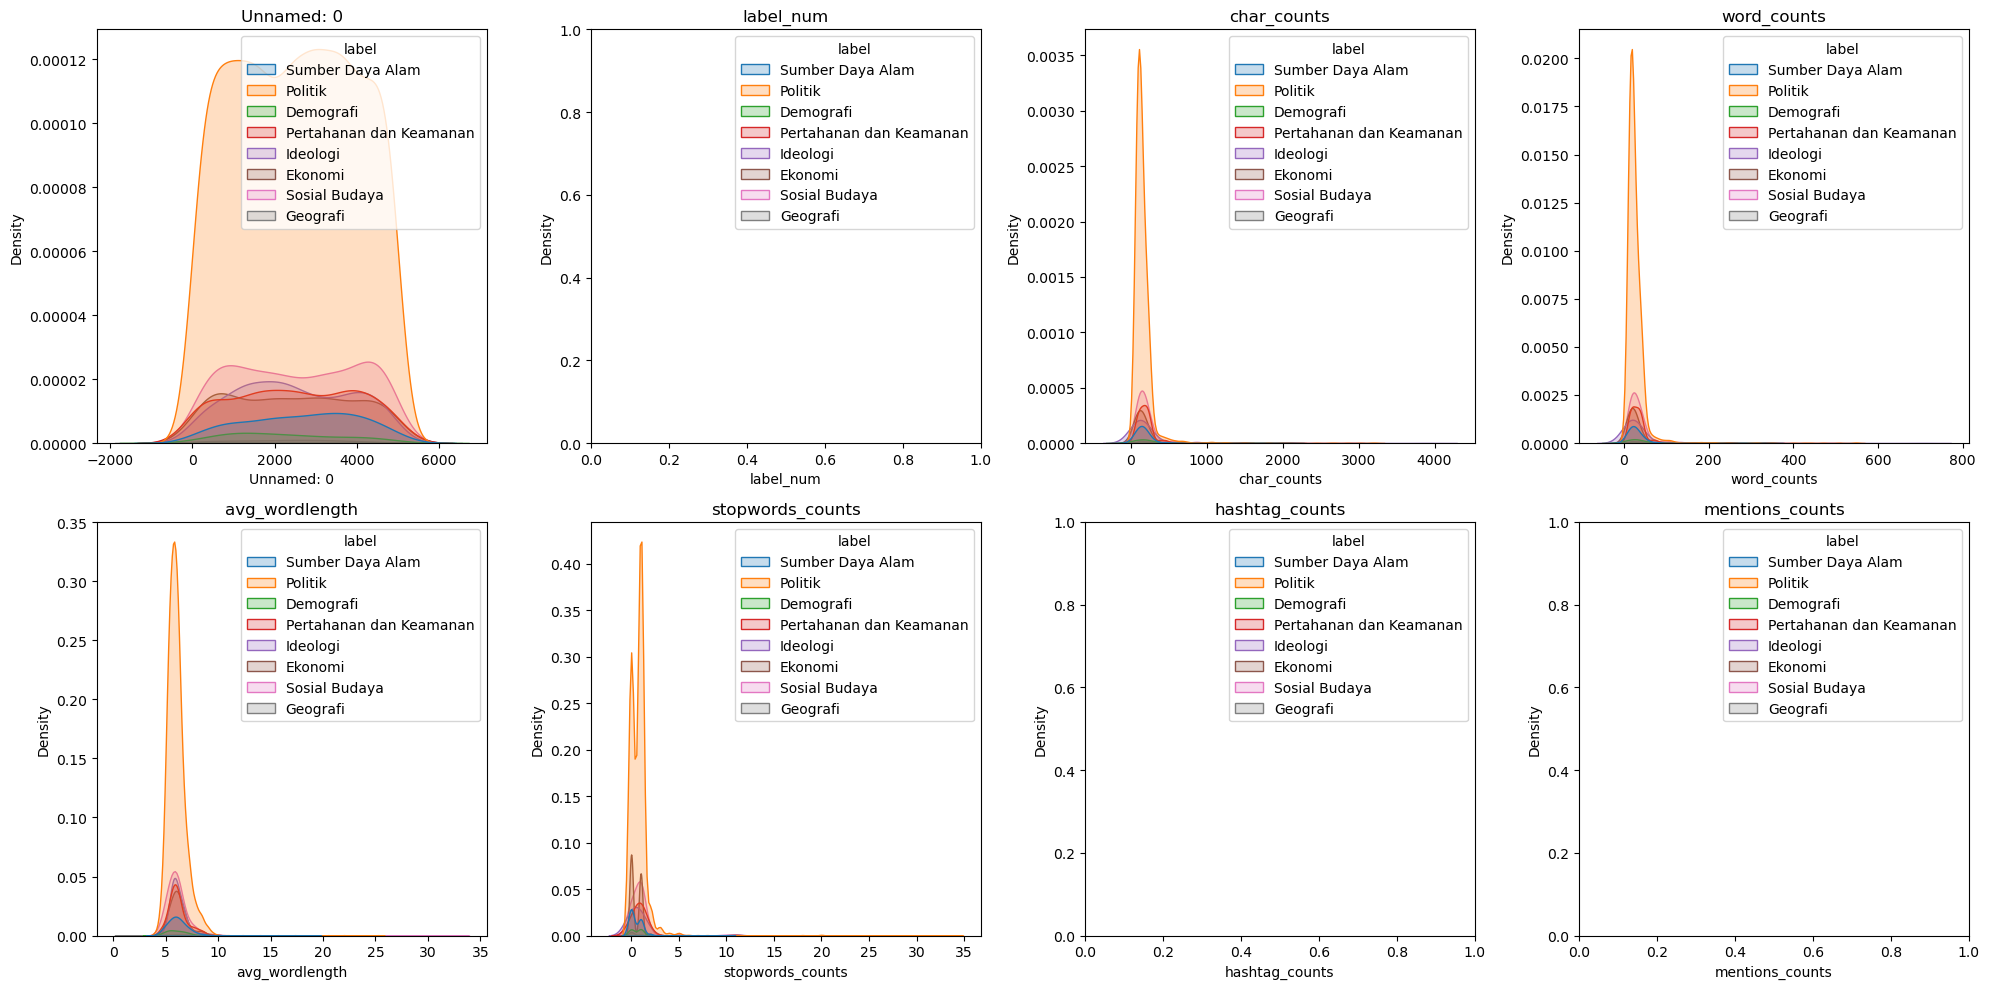

In [19]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot 2x4 grid histogram for each numerical feature
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns
if len(num_cols) > 8:
    num_cols = num_cols[:8]  # Limit to the first 8 numerical columns

# Plotting numerical columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i + 1)  # Adjust subplot indices dynamically
    sns.kdeplot(data=df, x=col, hue='label', fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [223]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 487.6 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.8 MB/s eta 0:00:00


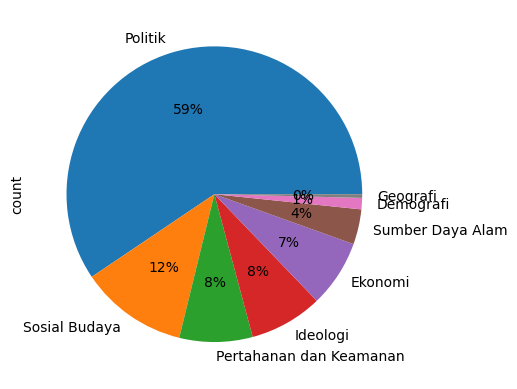

In [20]:
df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%')
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

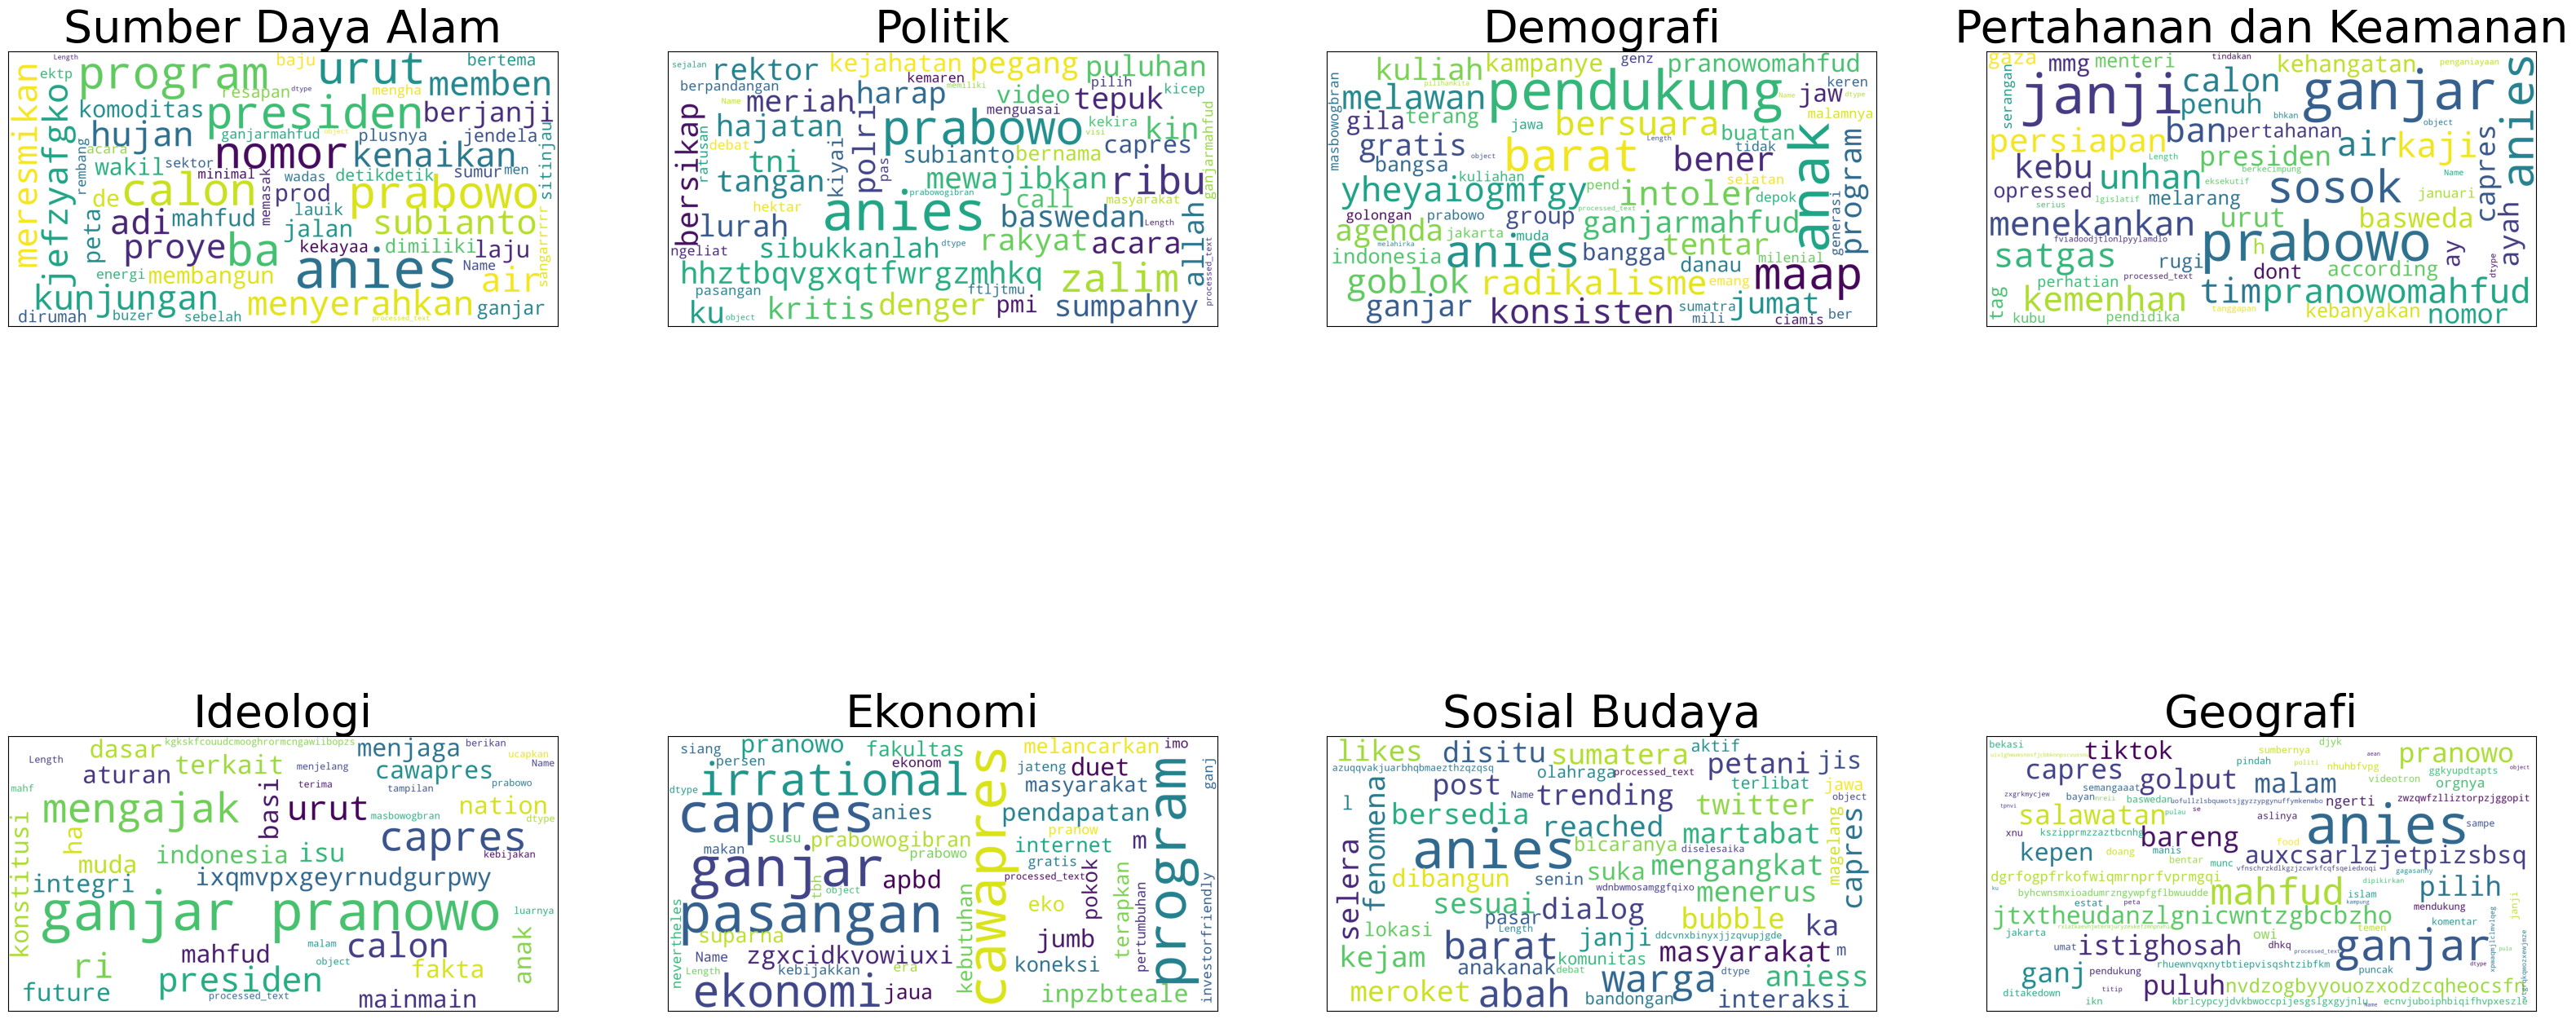

<Figure size 640x480 with 0 Axes>

In [21]:
# plot 2x4 grid word cloud for each sentiment
plt.figure(figsize=(40,20))

for index, col in enumerate(df['label'].unique()):
    plt.subplot(2,4, index+1)
    # print(col)
    df1 = df[df['label']==col]
    data = df1['processed_text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    # fig = plt.figure(figsize=(15,15))
    # plt.axis('off')
    # disable ticks
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

In [22]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['processed_text'] = df['processed_text'].apply(lambda x: x.lower())
df['processed_text'] = df['processed_text'].apply(lambda x: ps.remove_urls(x))
df['processed_text'] = df['processed_text'].apply(lambda x: ps.remove_html_tags(x))
df['processed_text'] = df['processed_text'].apply(lambda x: ps.remove_special_chars(x))
df['processed_text'] = df['processed_text'].apply(lambda x: ps.remove_rt(x))

In [23]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['label'], test_size=0.2, random_state=42)

In [24]:
X_train.shape, X_test.shape

((4000,), (1000,))

In [25]:
# Load stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])
list_stopwords = list(list_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split

# 1. Ekstraksi fitur teks
tfidf_vectorizer = TfidfVectorizer(stop_words=list_stopwords)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])
y = df['label']

# 3. Model dan evaluasi
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 2. Penerapan SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
clf.fit(X_resampled, y_resampled)

predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))
print("balance akurasi :", balanced_accuracy_score(y_test, predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


                         precision    recall  f1-score   support

              Demografi       1.00      0.08      0.14        13
                Ekonomi       0.88      0.63      0.73        59
               Geografi       0.00      0.00      0.00         4
               Ideologi       0.88      0.44      0.59        81
Pertahanan dan Keamanan       0.75      0.66      0.70        96
                Politik       0.75      0.95      0.84       586
          Sosial Budaya       0.77      0.47      0.59       120
       Sumber Daya Alam       0.68      0.32      0.43        41

               accuracy                           0.76      1000
              macro avg       0.71      0.44      0.50      1000
           weighted avg       0.77      0.76      0.74      1000

balance akurasi : 0.44277522845432526


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
original_indices = df.index.tolist()

In [52]:
X_test[:5]

<5x14309 sparse matrix of type '<class 'numpy.float64'>'
	with 210 stored elements in Compressed Sparse Row format>

In [55]:
X_resampled[:5]

<5x14309 sparse matrix of type '<class 'numpy.float64'>'
	with 99 stored elements in Compressed Sparse Row format>

In [54]:
y_test[:5]

1501                   Ideologi
2586    Pertahanan dan Keamanan
2653    Pertahanan dan Keamanan
1055                    Politik
705               Sosial Budaya
Name: label, dtype: object

In [48]:
# save model
import pickle

pickle.dump(clf, open('twitter_sentiment.pkl', 'wb'))

In [260]:
data_test = pd.read_csv("Text_Preprocessing_Test.csv")

In [261]:
data_test.head()

,Unnamed: 0,IDText,Text,text_tokens,text_tokens_WSW,text_normalized
0,0,TXT0001,lu mau org prodemokrasi di negara ini bisa pun...,"['lu', 'mau', 'org', 'prodemokrasi', 'di', 'ne...","['prodemokrasi', 'negara', 'kesempatan', 'ngel...","['prodemokrasi', 'negara', 'kesempatan', 'ngel..."
1,1,TXT0002,prabowo ditanya soal hutang luar negeri dia me...,"['prabowo', 'ditanya', 'soal', 'hutang', 'luar...","['prabowo', 'hutang', 'negeri', 'hutang', 'neg...","['prabowo', 'hutang', 'negeri', 'hutang', 'neg..."
2,2,TXT0003,kikidaliyo ganjar pranowo itulah beliau sosok ...,"['kikidaliyo', 'ganjar', 'pranowo', 'itulah', ...","['kikidaliyo', 'ganjar', 'pranowo', 'beliau', ...","['kikidaliyo', 'ganjar', 'pranowo', 'beliau', ..."
3,3,TXT0004,prabowo gibran yang bisa melakukan itu semua d...,"['prabowo', 'gibran', 'yang', 'bisa', 'melakuk...","['prabowo', 'gibran', 'kesejahteraan', 'rakyat']","['prabowo', 'gibran', 'kesejahteraan', 'rakyat']"
4,4,TXT0005,zulhendra lah justru yg gak nyambung junjungan...,"['zulhendra', 'lah', 'justru', 'yg', 'gak', 'n...","['zulhendra', 'nyambung', 'junjungan', 'elu', ...","['zulhendra', 'nyambung', 'junjungan', 'elu', ..."


In [263]:
data_test = data_test.rename(columns={'Text': 'text'})

In [264]:
data_test = ps.get_basic_features(data_test)

In [266]:
data_test.columns  

Index(['Unnamed: 0', 'IDText', 'text', 'text_tokens', 'text_tokens_WSW',
       'text_normalized', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [267]:
data_test['text'] = data_test['text'].apply(lambda x: x.lower())
data_test['text'] = data_test['text'].apply(lambda x: ps.remove_urls(x))
data_test['text'] = data_test['text'].apply(lambda x: ps.remove_html_tags(x))
data_test['text'] = data_test['text'].apply(lambda x: ps.remove_special_chars(x))
data_test['text'] = data_test['text'].apply(lambda x: ps.remove_rt(x))

In [268]:
X_test_new = tfidf_vectorizer.transform(data_test['text'])  # Sesuaikan dengan nama kolom teks Anda

# Langsung lakukan prediksi
predictions = clf.predict(X_test_new)

# Tambahkan hasil prediksi ke dalam dataframe atau simpan ke dalam file
data_test['predicted_label'] = predictions

# Menyimpan hasil prediksi (opsional)
data_test.to_csv("predicted_results.csv", index=False)

In [269]:
data_test['predicted_label']

0                      Politik
1      Pertahanan dan Keamanan
2                      Politik
3                      Politik
4                      Politik
                ...           
995                    Politik
996                    Politik
997                    Politik
998                    Ekonomi
999                    Politik
Name: predicted_label, Length: 1000, dtype: object

In [300]:
hasil2 = pd.read_csv('data/template_jawaban_penyisihan_bdc_2024.csv', delimiter =  ';')

In [301]:
hasil2['Label'] = data_test['predicted_label']

In [304]:
hasil2.rename(columns={'Label': 'Kelas'}, inplace=True)

In [305]:
hasil2.head()

,IDText,Kelas
0,TXT0001,Politik
1,TXT0002,Pertahanan dan Keamanan
2,TXT0003,Politik
3,TXT0004,Politik
4,TXT0005,Politik


In [306]:
hasil2.to_csv("gassemifinall.csv", index=False)

# COBA METHODE LAIN

In [248]:
import os
import pickle
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

x = df['processed_text']
y = df['label']

Encoder = LabelEncoder()
Y_train = Encoder.fit_transform(y)

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(x)
X_train_Tfidf = Tfidf_vect.transform(x)



SVM = SVC(C=1.0, kernel = 'linear', degree=3, gamma='auto')
SVM.fit(X_train_Tfidf, Y_train)

# Saving the model
with open('SVM_classifier_24.pickle', 'wb') as file:
    pickle.dump(SVM, file)

print("Proses training SVM Selesai")

Proses training SVM Selesai


In [204]:
import pickle

# Loading the saved model
with open('SVM_classifier_24.pickle', 'rb') as file:
    svm_classifier = pickle.load(file)

print(svm_classifier)

SVC(gamma='auto', kernel='linear')


In [206]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


vect = TfidfVectorizer(max_features = 1000, binary = true)
X = vect.fit_transform


In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))
#5. calculate and print the balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

                         precision    recall  f1-score   support

              Demografi       0.00      0.00      0.00        13
                Ekonomi       0.70      0.09      0.16        79
               Geografi       0.00      0.00      0.00         5
               Ideologi       1.00      0.29      0.45        75
Pertahanan dan Keamanan       0.95      0.26      0.41        76
                Politik       0.65      1.00      0.79       594
          Sosial Budaya       0.93      0.24      0.38       119
       Sumber Daya Alam       0.80      0.10      0.18        39

               accuracy                           0.67      1000
              macro avg       0.63      0.25      0.30      1000
           weighted avg       0.73      0.67      0.60      1000

Balanced Accuracy: 0.2477


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [250]:
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

ss = ShuffleSplit(n_splits = 10, test_size = 0.2)
sm = SMOTE()

accs = []
f1s = []
cms = []
baccs = []

for train_index, test_index, in ss.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_vect = vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)

    X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)


    SVM.fit(X_train_res, y_train_res)
    y_pred = SVM.predict(X_test_vect)


    baccs.append(balanced_accuracy_score(y_test, y_pred))
    accs.append(accuracy_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred, average = 'weighted'))
    cms.append(confusion_matrix(y_test, y_pred))



print(classification_report(y_test, y_pred))
print(f"Balanced Accuracy: {balanced_acc:.4f}")

KeyboardInterrupt: 

In [165]:
from sklearn.ensemble import RandomForestClassifier
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))
#5. calculate and print the balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       594
           1       0.87      0.39      0.54       117
           2       0.88      0.56      0.69        80
           3       0.93      0.49      0.64        80
           4       0.82      0.64      0.72        73
           5       0.85      0.28      0.42        39
           6       1.00      0.15      0.27        13
           7       0.00      0.00      0.00         4

    accuracy                           0.77      1000
   macro avg       0.76      0.44      0.52      1000
weighted avg       0.79      0.77      0.74      1000

Balanced Accuracy: 0.4374


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import string
import re

# Create Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Lowercase
    text = text.lower()
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords and stem each word
    filtered_tokens = []
    for token in tokens:
        if token not in list_stopwords:
            filtered_tokens.append(stemmer.stem(token))
    
    # Join tokens back into a string
    preprocessed_text = " ".join(filtered_tokens)
    
    return preprocessed_text

In [33]:
df['processed_text'] = df['text'].apply(preprocess)

KeyboardInterrupt: 

In [166]:
X_test[:5]

2263    clear anies baswedan hutang apapun prabowo hut...
725     baiklahsaya dukung ganjar mahfud menghemat tri...
4908    prabowo buka media was serious sign questions ...
572         mahfud ganjar pranowo bangsa bersatu cerahjnc
1070    karna hadir benteng kuto besak masyarakat pale...
Name: processed_text, dtype: object

In [167]:
y_test[:5]

2263    0
725     0
4908    0
572     0
1070    0
Name: label_num, dtype: int64

In [168]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [169]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[580,   3,   2,   1,   8,   0,   0,   0],
       [ 68,  46,   1,   1,   0,   1,   0,   0],
       [ 34,   0,  45,   0,   0,   1,   0,   0],
       [ 37,   1,   2,  39,   1,   0,   0,   0],
       [ 25,   1,   0,   0,  47,   0,   0,   0],
       [ 25,   1,   0,   1,   1,  11,   0,   0],
       [  9,   1,   1,   0,   0,   0,   2,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

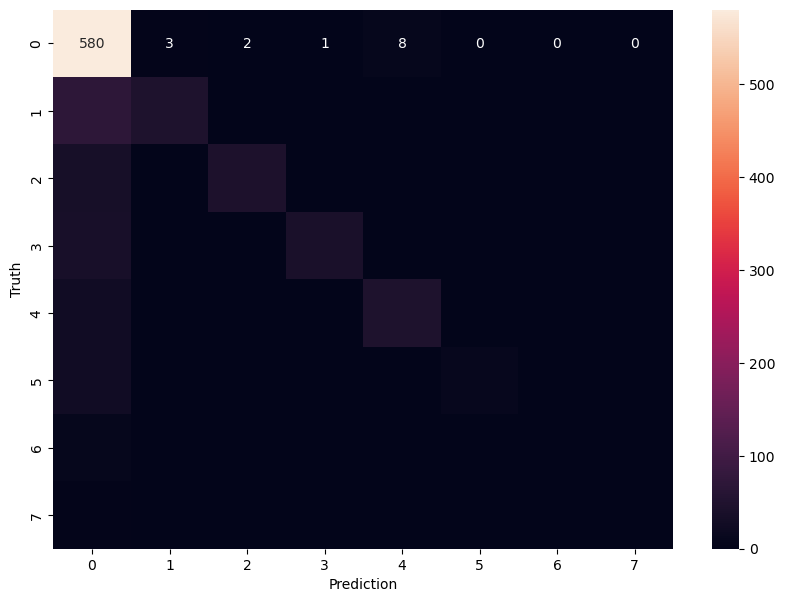

In [170]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [31]:
df = pd.read_csv("Text_Preprocessing_Test.csv")

In [33]:
import pandas as pd
import string
import re
import nltk
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the normalization dictionary from CSV
normalized_word = pd.read_csv("normalisasi_twitter.csv")
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row.iloc[0] not in normalized_word_dict:
        normalized_word_dict[row.iloc[0]] = row.iloc[1]

# Preprocessing functions
def remove_tweet_special(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

def remove_number(text):
    return re.sub(r"\d+", "", text)

def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+', ' ', text)

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def stopwords_removal(text, stopwords):
    words = text.split()
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

def normalized_term(text, normalization_dict):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Load stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

txt_stopword = pd.read_csv("stopwords.txt", names=["stopwords"], header=None)
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)

# Apply all preprocessing steps
def preprocess_text(text):
    text = remove_tweet_special(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = remove_whitespace_LT(text)
    text = remove_whitespace_multiple(text)
    text = remove_single_char(text)
    text = stopwords_removal(text, list_stopwords)
    text = normalized_term(text, normalized_word_dict)
    return text

# Assuming df is your DataFrame and it has a column 'text'
df['processed_text'] = df['Text'].apply(preprocess_text)

print('Preprocessing Result : \n') 
print(df['processed_text'].head())
print('\n\n\n')


Preprocessing Result : 

0    prodemokrasi negara kesempatan ngelawan oligar...
1    prabowo hutang negeri hutang negeri indonesia ...
2    kikidaliyo ganjar pranowo beliau sosok mengagu...
3                  prabowo gibran kesejahteraan rakyat
4    zulhendra nyambung junjungan elu aomkmkmkmk ng...
Name: processed_text, dtype: object






[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jirya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [116]:
X_test = df['Text']

In [159]:
label_maps = {0 :"Politik" , 1 : "Sosial Budaya", 2 : "Pertahanan dan Keamanan", 3 : "Ideologi", 
             4 : "Ekonomi" , 5 : "Sumber Daya Alam", 6 : "Demografi", 7 : "Geografi" }

In [160]:
predictions = clf.predict(X_test)

In [161]:
print(predictions)

[0 0 0 0 0 3 0 2 0 0 0 0 0 5 1 4 0 4 0 1 0 2 6 0 0 0 4 4 0 1 4 0 0 0 2 4 0
 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0
 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 3 0 0 4 0 0 0 1 0 0 0 0 0 3 0 0 3 0 0 0 0 1 0 0 2 0 0 4 4 4 0 0 0
 4 0 0 0 3 0 0 0 0 0 0 0 2 0 0 0 0 4 0 1 0 0 4 0 0 0 0 0 4 2 0 0 0 3 0 0 0
 0 0 0 0 0 0 0 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 1 0 0 1 0 2 0 1 0 0 0 4 0 0 0 0 0 0 0 0 0 1 4 0 2 0 0 0 0 0 0 4 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 4 0 0 0 4 0 2 0 0 1 0 0 4 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 4 0 0 0 0 3 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 3 0 0 1 0 0 3 0 0 0 0 0 0 4 0 3 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 3 0 0 0 0 0 2 0 0 0 2 4 0 0 2 0 1 0 0 0 0 0 0 4 0 0
 3 1 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0 1 0 1 2 4 0 0 0 0 4 0 0 0 0 3
 3 0 0 0 0 0 0 0 0 2 4 0 

In [162]:
df = pd.DataFrame({'Label':predictions})

In [163]:
df['Label'] = df['Label'].map(label_maps)

In [164]:
df.head()

,Label
0,Politik
1,Politik
2,Politik
3,Politik
4,Politik


In [172]:
hasil = pd.read_csv('data/template_jawaban_penyisihan_bdc_2024.csv', delimiter =  ';')

In [173]:
hasil['Label'] = df['Label']

In [174]:
hasil.head()

,IDText,Label
0,TXT0001,Politik
1,TXT0002,Politik
2,TXT0003,Politik
3,TXT0004,Politik
4,TXT0005,Politik


In [175]:
hasil['IDText;Label'] = hasil['IDText'] + ';'+ hasil['Label']

In [177]:
hasil = hasil.drop(columns=['IDText','Label'])

In [178]:
hasil.head()

,IDText;Label
0,TXT0001;Politik
1,TXT0002;Politik
2,TXT0003;Politik
3,TXT0004;Politik
4,TXT0005;Politik


In [180]:
hasil.to_csv("bisayok.csv", index=False)

In [126]:
for i, x in enumerate(predictions):
    predictions[i] = label_maps[x]

KeyError: 0

In [85]:
label_map = {
    0: "Label 0",
    1: "Label 1",
    2: "Label 2",
    # ... add more mappings as needed
}

In [87]:
predictions

['Label 1', 'Label 2', 'Label 0', 'Label 2', 'Label 1']

Bags of Words using Count Vectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4000x12715 sparse matrix of type '<class 'numpy.int64'>'
	with 63210 stored elements in Compressed Sparse Row format>

In [40]:
X_train_cv.toarray()[:2][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
X_train_cv.shape

(4000, 12715)

In [42]:
v.get_feature_names_out()[1771]

'cenderung'

In [43]:
v.vocabulary_

{'anies': 411,
 'sayang': 10346,
 'saudara': 10334,
 'penyandang': 9056,
 'disabilitas': 2787,
 'yurissasamosir': 12633,
 'videotron': 12272,
 'calon': 1705,
 'presiden': 9546,
 'capres': 1725,
 'nomor': 8177,
 'urut': 12184,
 'baswedan': 850,
 'jakarta': 4611,
 'mendadak': 6961,
 'ditake': 2887,
 'down': 3041,
 'terkait': 11556,
 'pemerintah': 8813,
 'provinsi': 9633,
 'pemprov': 8831,
 'dki': 2991,
 'buka': 1609,
 'suara': 11053,
 'plt': 9385,
 'kepala': 5374,
 'dinas': 2648,
 'komunikasi': 5749,
 'informatika': 4391,
 'statistik': 11016,
 'kominfotik': 5722,
 'sigit': 10749,
 'wijatmoko': 12427,
 'downnya': 3044,
 'dipasang': 2680,
 'graha': 3831,
 'mandiri': 6449,
 'menteng': 7370,
 'pusat': 9707,
 'kaitannya': 4923,
 'kebijakan': 5126,
 'penayangan': 8860,
 'konten': 5788,
 'menaikkan': 6888,
 'menurunkan': 7394,
 'sepenuhnya': 10606,
 'ranah': 9851,
 'pengelola': 8949,
 'diskominfotik': 2859,
 'selasa': 10503,
 'simak': 10768,
 'berita': 1109,
 'selengkapnya': 10509,
 'politik': 

In [44]:
X_train_np = X_train_cv.toarray()
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
import numpy as np
np.where(X_train_np[0]!=0)

(array([  411,  2787,  9056, 10334, 10346, 12633], dtype=int64),)

In [51]:
X_train[:853]

1871    anies sayang saudara penyandang disabilitas yu...
4582    videotron calon presiden capres nomor urut ani...
2200    nelayan indonesia tidak terjebak utang tidak k...
963     tni polri ulama kiai pesantren insya allah neg...
2113    qozdwetetexrjwgouasmthcmvfg china kristen warg...
                              ...                        
4352    ganjar pranowo pendidikan inklusif merata wilayah
2588    prabowo pertanggung jawabkan kegagalan food es...
73      sebatas wacana mending langkah pasangan ganjar...
697     capres ganjar pranowo heboh melanjutkan menamb...
1733    terima berikan kementerian pertahanan mendenga...
Name: processed_text, Length: 853, dtype: object

In [52]:
X_train_np[0][1771]

0

In [53]:

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

In [54]:
X_test_cv = v.transform(X_test)

In [56]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       594
           1       0.73      0.47      0.57       117
           2       0.80      0.51      0.63        80
           3       0.85      0.41      0.55        80
           4       0.83      0.55      0.66        73
           5       1.00      0.23      0.38        39
           6       1.00      0.15      0.27        13
           7       0.00      0.00      0.00         4

    accuracy                           0.75      1000
   macro avg       0.74      0.41      0.49      1000
weighted avg       0.77      0.75      0.72      1000

Balanced Accuracy: 0.4111


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [62]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [63]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc:.4f}")

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       594
           1       0.73      0.47      0.57       117
           2       0.80      0.51      0.63        80
           3       0.85      0.41      0.55        80
           4       0.83      0.55      0.66        73
           5       1.00      0.23      0.38        39
           6       1.00      0.15      0.27        13
           7       0.00      0.00      0.00         4

    accuracy                           0.75      1000
   macro avg       0.74      0.41      0.49      1000
weighted avg       0.77      0.75      0.72      1000

Balanced Accuracy: 0.4111


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import transformers

from tokenizers import BertWordPieceTokenizer

In [66]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(max_length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)